<img src = "../Assets/imgs/ML-Codo-g.jpg" alt = "Encabezado MLDS" width = "25%" style="float: left; margin-right:20px" >  </img>

## **MeLi Challenge - Similitud de items**
### **Notebook 01: Análisis de datos extraidos de la API**
**Por: Andrés Felipe Camacho Baquero - [Personal website](https://anfelipecb.github.io/)**


Este código tiene el objetivo de llamar los datos de la `API`, hacer algunos análisis, y preparar los datos finales que serán pasados a los siguientes `notebooks`.  Dado que ya en el notebook `01` entendí cómo manejar la API y me ayudó a filtrar la categoría escogida.

**Outline:**
1. Verificación del entorno virtual e importación de las librerías necesarias 
2. Importamos los datos de la API con la funcion creada en custom_funcs
3. Analisis de los datos importados

> **Nota:** Se debe configurar y activar el entorno virtual (README.md)

---

#### 1. Verificamos entorno virtual 

In [1]:
# Verifiquemos que el entorno en que corre este jupyter es el mismo virutal llamado (melienv)
import os, sys
import pandas as pd

os.getcwd() 
print(sys.executable) #debe datnos el entorno virtual 
sys.path.append('../similarity') #Agrego el paquete de python que creé para las funciones personalizadas, la url de la API, etc.

/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/melienv/bin/python


#### 2. Importamos los datos: 
Las funciones que hacen que esto funcione están en `similarity/custom_funcs.py`

In [2]:
#Traemos la función para optener el DataFrame
from similarity.custom_funcs import get_data_API_items
cat_id='MLA1000' 
offset=0 
#data_frame con los resultados
df_items=get_data_API_items(cat_id,offset=offset) # Para en 1049 por la API
#Tengo otra categoría más específica de datos tipo auriculares bluetooth 
cat_id_especifico='MLA409810'
dt_items_especificos=get_data_API_items(cat_id_especifico,offset=offset)


El limite de items es 472295
va en el ofsett: 50 con tamaño:50
va en el ofsett: 99 con tamaño:49
va en el ofsett: 148 con tamaño:49
va en el ofsett: 198 con tamaño:50
va en el ofsett: 248 con tamaño:50
va en el ofsett: 298 con tamaño:50
va en el ofsett: 348 con tamaño:50
va en el ofsett: 398 con tamaño:50
va en el ofsett: 448 con tamaño:50
va en el ofsett: 498 con tamaño:50
va en el ofsett: 548 con tamaño:50
va en el ofsett: 598 con tamaño:50
va en el ofsett: 648 con tamaño:50
va en el ofsett: 698 con tamaño:50
va en el ofsett: 748 con tamaño:50
va en el ofsett: 798 con tamaño:50
va en el ofsett: 848 con tamaño:50
va en el ofsett: 898 con tamaño:50
va en el ofsett: 948 con tamaño:50
va en el ofsett: 998 con tamaño:50
va en el ofsett: 1048 con tamaño:50
Error obteniendo los datos: 403
El limite de items es 147093
va en el ofsett: 50 con tamaño:50
va en el ofsett: 98 con tamaño:48
va en el ofsett: 148 con tamaño:50
va en el ofsett: 198 con tamaño:50
va en el ofsett: 248 con tamaño:50
va 

In [11]:
# Las bases que sacamos de la API
dt_items_especificos.head(2)

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,permalink,buying_mode,site_id,category_id,...,variations_data.94260079421.ratio,variations_data.94260079421.name,variations_data.94260079421.pictures_qty,variations_data.94260079421.inventory_id,variations_data.94260079421.user_product_id,brand,line,model,package_length,package_weight
0,MLA1533712914,Parlante Bluetooth Noblex Psb1000p 45w Portáti...,new,836398-MLU74179824164_012024,MLA22905666,gold_special,https://www.mercadolibre.com.ar/parlante-bluet...,buy_it_now,MLA,MLA8618,...,NaN,NaN,NaN,NaN,NaN,Noblex,None,PSB1000P,17.2 cm,2560 g
1,MLA1479723106,Auriculares Bluetooth M10 Pro Superior F9-5 Ca...,new,709514-MLU70396821088_072023,MLA24436771,gold_special,https://www.mercadolibre.com.ar/auriculares-bl...,buy_it_now,MLA,MLA3697,...,NaN,NaN,NaN,NaN,NaN,M10 Pro,None,M10,10.8 cm,120 g


In [10]:
# Las bases que sacamos de la API tienen diferentes dominios
df_items['domain_id'].value_counts()
dt_items_especificos['domain_id'].value_counts()

domain_id
MLA-HEADPHONES                                 570
MLA-SPEAKERS                                   181
MLA-MICROPHONES                                110
MLA-AM_FM_SW_RADIOS                             29
MLA-LED_STAGE_LIGHTS                            22
MLA-SMART_SPEAKERS                              14
MLA-AUDIO_INTERFACES                            13
MLA-HOME_THEATERS                               11
MLA-STAGE_LASER_LIGHTS                          11
MLA-MICROPHONE_STANDS                           10
MLA-TURNTABLES                                   9
MLA-SPEAKERS_STANDS                              7
MLA-SOUND_CONSOLES_AND_MIXERS                    6
MLA-TABLE_AND_ALARM_CLOCKS                       5
MLA-DIGITAL_VOICE_RECORDERS                      5
MLA-MINI_COMPONENT_SYSTEMS                       4
MLA-BOOMBOXES                                    4
MLA-MIRROR_BALLS                                 4
MLA-DJ_CONTROLLERS                               4
MLA-ELECTRONIC_PRODUC

In [15]:
#Filtremos solo los que tiene adifonos de esa última que tiene más tipos de audifonos
df_especificos_audifonos=dt_items_especificos[dt_items_especificos['domain_id']=='MLA-HEADPHONES']
#El ejercicio lo haré igual sobre todas las de items_específicos para comparar con cierta variabilidad de embeddings y que los cluster sirvan

#Exportamos esos dataframes al path de data raw
from similarity.config import data_raw
dt_items_especificos.to_csv(data_raw/'df_items_especificos.csv', index=False)
df_especificos_audifonos.to_csv(data_raw/'df_solo_audifonos.csv', index=False)

#### 4. Analisis de resultados 

In [17]:
#Conteo de categorías
import plotly.graph_objects as go
conteo_categorias=df_items['domain_id'].value_counts().reset_index()
conteo_categorias.columns = ['categoria', 'conteo']
#Umbral para 'otros'
umbral =3
categorias_principales = conteo_categorias[conteo_categorias['conteo'] > umbral]
otros = conteo_categorias[conteo_categorias['conteo'] <= umbral].sum(numeric_only=True)
otros['categoria'] = 'Otros'
# Combinar nuevamente
conteo_final = pd.concat([categorias_principales, pd.DataFrame([otros])], ignore_index=True)

# Crear un treemap
fig = go.Figure(go.Treemap(
    labels = conteo_categorias['categoria'],
    parents=[""]*len(conteo_categorias),
    values = conteo_categorias['conteo'],
    textinfo = "label+value",
    marker=dict(colors=conteo_final['conteo'], colorscale='Blues'), # Personalizar rampa de colores
))

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
# Guardar la figura
fig.write_image("figures/treemap_categorias2.png")
fig.show()

In [18]:
df_items.describe()

,order_backend,price,original_price,available_quantity,official_store_id,seller.id,installments.quantity,installments.amount,installments.rate,differential_pricing.id,...,variations_data.65011529338.pictures_qty,variations_data.65011529332.pictures_qty,variations_data.87450265899.pictures_qty,variations_data.87450265889.pictures_qty,variations_data.65003181362.pictures_qty,variations_data.65011529329.pictures_qty,variations_data.180786519635.pictures_qty,variations_data.180787442655.pictures_qty,variations_data.181500186623.pictures_qty,variations_data.175548595683.pictures_qty
count,1048.000000,1.048000e+03,4.440000e+02,1048.000000,180.000000,1.048000e+03,995.000000,9.950000e+02,995.000000,9.900000e+01,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,25.480916,2.234435e+05,2.745261e+05,180.223282,2170.866667,3.126946e+08,5.864322,6.054044e+04,53.057608,3.528163e+07,...,5.0,6.0,7.0,5.0,5.0,5.0,1.0,1.0,5.0,10.0
std,14.444890,5.050866e+05,5.193209e+05,1646.582285,4882.162983,3.343095e+08,0.679303,1.287904e+05,17.645323,8.362198e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.197320e+03,2.000000e+03,1.000000,47.000000,1.090890e+05,3.000000,1.130800e+03,0.000000,3.367819e+07,...,5.0,6.0,7.0,5.0,5.0,5.0,1.0,1.0,5.0,10.0
25%,13.000000,1.256975e+04,1.695075e+04,1.000000,945.000000,7.821206e+07,6.000000,3.736740e+03,58.920000,3.571329e+07,...,5.0,6.0,7.0,5.0,5.0,5.0,1.0,1.0,5.0,10.0
50%,25.000000,3.601900e+04,5.814100e+04,1.000000,1938.000000,1.958322e+08,6.000000,1.059175e+04,58.920000,3.571332e+07,...,5.0,6.0,7.0,5.0,5.0,5.0,1.0,1.0,5.0,10.0
75%,38.000000,2.322478e+05,3.565108e+05,50.000000,2839.000000,4.242186e+08,6.000000,6.763105e+04,58.920000,3.571332e+07,...,5.0,6.0,7.0,5.0,5.0,5.0,1.0,1.0,5.0,10.0
max,50.000000,6.999999e+06,4.293849e+06,50000.000000,65728.000000,1.623454e+09,9.000000,1.966666e+06,58.920000,3.571338e+07,...,5.0,6.0,7.0,5.0,5.0,5.0,1.0,1.0,5.0,10.0


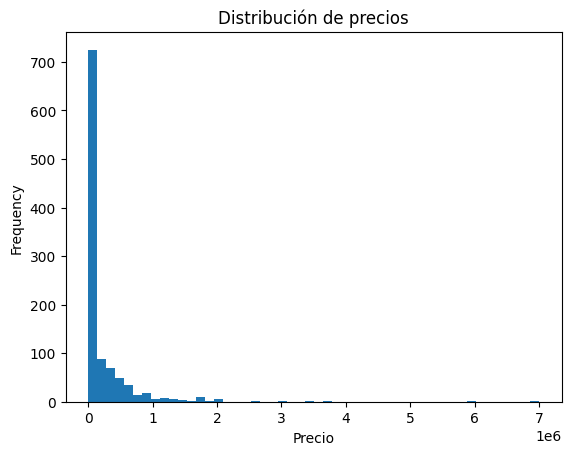

In [19]:
import matplotlib.pyplot as plt
df_items['price'].plot(kind='hist', bins=50, title='Distribución de precios')
plt.xlabel('Precio')
plt.show()